In [1]:
# Import necessary libraries
import sys
import os
import numpy as np
import pandas as pd
import json
import sqlite3
%load_ext sql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sqlalchemy import Column, Integer, String, ForeignKey
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [3]:
# Directories
# Main directory
main_dir = os.path.abspath('..\\\\..\\\\')
# Data directory
data_dir = os.path.join(main_dir, 'Data')
# Source data directory
data_source_dir = os.path.join(main_dir, 'Data', 'Source')
# Preprocessing data directory
data_preproc_dir = os.path.join(main_dir, 'Data', 'Preprocessing')
# Database data directory
data_database_dir = os.path.join(main_dir, 'Data', 'Database')

In [4]:
# Read the metadata file
file_name = 'database_cleaned.csv'
df = pd.read_csv(os.path.join(data_preproc_dir, file_name), header=0, index_col=0)
df

,type,name,required_age,is_free,supported_languages,pc_requirements,mac_requirements,linux_requirements,legal_notice,developers,...,metacritic,drm_notice,currency,initial,final,discount_percent,initial_formatted,final_formatted,recurring_sub,recurring_sub_desc
steam_appid,,,,,,,,,,,,,,,,,,,,,
1198490,game,All That Remains: Part 1,0,False,"English<strong>*</strong>, French, Italian, Ge...",{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],Copyright Glitch Games Ltd 2012 - 2021,['Glitch Games'],...,NaN,NaN,EUR,2.39,239.0,0.0,NaN,"2,39€",NaN,NaN
1198510,game,Paperball,0,False,"English<strong>*</strong>, German, Japanese, D...",{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],NaN,['Cliax Games'],...,NaN,NaN,EUR,9.99,999.0,0.0,NaN,"9,99€",NaN,NaN
1198550,game,Moderium,0,False,English<strong>*</strong><br><strong>*</strong...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],NaN,['All Saints Gaming'],...,NaN,NaN,EUR,0.79,79.0,0.0,NaN,"0,79€",NaN,NaN
1198600,game,Pizza Time Explosion,0,False,English,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],"""Pizza Time Explosion"" game software is © 2019...",['Electric Prune Juice'],...,NaN,NaN,EUR,4.99,499.0,0.0,NaN,"4,99€",NaN,NaN
1198630,game,Customer Cums First!,0,False,English,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,NaN,['Miel'],...,NaN,NaN,EUR,9.99,999.0,0.0,NaN,"9,99€",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113770,game,Lunch A Palooza,0,False,"English, French, Italian, German, Spanish - Sp...",{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],©2019 Alternative Software Ltd.<br />\r\n©2019...,['Seashell Studio'],...,NaN,NaN,EUR,10.79,1079.0,0.0,NaN,"10,79€",NaN,NaN
1113780,game,Uncharted Tides: Port Royal,0,False,"English<strong>*</strong>, French, Italian, Ge...",{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,© 2019 Artifex Mundi S.A. All rights reserved....,['Cordelia Games'],...,NaN,NaN,EUR,14.99,1499.0,0.0,NaN,"14,99€",NaN,NaN
1113000,game,Persona 4 Golden,0,False,"English<strong>*</strong>, Japanese<strong>*</...",{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],©ATLUS. ©SEGA. All rights reserved.,['ATLUS'],...,NaN,Denuvo Anti-tamper,EUR,19.99,1999.0,0.0,NaN,"19,99€",NaN,NaN


In [5]:
df = df.reset_index()

In [6]:
df

,steam_appid,type,name,required_age,is_free,supported_languages,pc_requirements,mac_requirements,linux_requirements,legal_notice,...,metacritic,drm_notice,currency,initial,final,discount_percent,initial_formatted,final_formatted,recurring_sub,recurring_sub_desc
0,1198490,game,All That Remains: Part 1,0,False,"English<strong>*</strong>, French, Italian, Ge...",{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],Copyright Glitch Games Ltd 2012 - 2021,...,NaN,NaN,EUR,2.39,239.0,0.0,NaN,"2,39€",NaN,NaN
1,1198510,game,Paperball,0,False,"English<strong>*</strong>, German, Japanese, D...",{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],NaN,...,NaN,NaN,EUR,9.99,999.0,0.0,NaN,"9,99€",NaN,NaN
2,1198550,game,Moderium,0,False,English<strong>*</strong><br><strong>*</strong...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],NaN,...,NaN,NaN,EUR,0.79,79.0,0.0,NaN,"0,79€",NaN,NaN
3,1198600,game,Pizza Time Explosion,0,False,English,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],"""Pizza Time Explosion"" game software is © 2019...",...,NaN,NaN,EUR,4.99,499.0,0.0,NaN,"4,99€",NaN,NaN
4,1198630,game,Customer Cums First!,0,False,English,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,NaN,...,NaN,NaN,EUR,9.99,999.0,0.0,NaN,"9,99€",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,1113770,game,Lunch A Palooza,0,False,"English, French, Italian, German, Spanish - Sp...",{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],©2019 Alternative Software Ltd.<br />\r\n©2019...,...,NaN,NaN,EUR,10.79,1079.0,0.0,NaN,"10,79€",NaN,NaN
4618,1113780,game,Uncharted Tides: Port Royal,0,False,"English<strong>*</strong>, French, Italian, Ge...",{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,© 2019 Artifex Mundi S.A. All rights reserved....,...,NaN,NaN,EUR,14.99,1499.0,0.0,NaN,"14,99€",NaN,NaN
4619,1113000,game,Persona 4 Golden,0,False,"English<strong>*</strong>, Japanese<strong>*</...",{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],©ATLUS. ©SEGA. All rights reserved.,...,NaN,Denuvo Anti-tamper,EUR,19.99,1999.0,0.0,NaN,"19,99€",NaN,NaN
4620,1113060,game,Magic Farm 3: The Ice Danger,0,False,English,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],NaN,...,NaN,NaN,EUR,16.79,1679.0,0.0,NaN,"16,79€",NaN,NaN


In [7]:
df.columns

Index(['steam_appid', 'type', 'name', 'required_age', 'is_free',
       'supported_languages', 'pc_requirements', 'mac_requirements',
       'linux_requirements', 'legal_notice', 'developers', 'publishers',
       'price_overview', 'packages', 'package_groups', 'platforms',
       'categories', 'genres', 'screenshots', 'movies', 'release_date',
       'support_info', 'background', 'content_descriptors', 'num_reviews',
       'review_score', 'review_score_desc', 'total_positive', 'total_negative',
       'total_reviews', 'controller_support', 'dlc', 'demos',
       'recommendations', 'achievements', 'reviews', 'ext_user_account_notice',
       'metacritic', 'drm_notice', 'currency', 'initial', 'final',
       'discount_percent', 'initial_formatted', 'final_formatted',
       'recurring_sub', 'recurring_sub_desc'],
      dtype='object')

In [8]:
df.genres

0              [{'id': '25', 'description': 'Adventure'}]
1       [{'id': '1', 'description': 'Action'}, {'id': ...
2       [{'id': '1', 'description': 'Action'}, {'id': ...
3       [{'id': '1', 'description': 'Action'}, {'id': ...
4                  [{'id': '4', 'description': 'Casual'}]
                              ...                        
4617    [{'id': '1', 'description': 'Action'}, {'id': ...
4618    [{'id': '25', 'description': 'Adventure'}, {'i...
4619                  [{'id': '3', 'description': 'RPG'}]
4620    [{'id': '4', 'description': 'Casual'}, {'id': ...
4621    [{'id': '1', 'description': 'Action'}, {'id': ...
Name: genres, Length: 4622, dtype: object

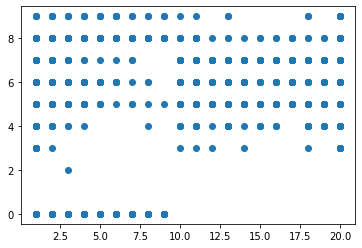

In [9]:
plt.scatter(df.num_reviews, df.review_score)
plt.show()

In [10]:
df.review_score.value_counts()

0    2102
5     658
7     607
8     587
6     482
4     122
9      44
3      19
2       1
Name: review_score, dtype: int64

In [11]:
df.review_score

0       0
1       8
2       0
3       7
4       7
       ..
4617    7
4618    7
4619    9
4620    0
4621    0
Name: review_score, Length: 4622, dtype: int64

In [12]:
df.review_score_desc

0                4 user reviews
1                 Very Positive
2                1 user reviews
3                      Positive
4                      Positive
                 ...           
4617                   Positive
4618                   Positive
4619    Overwhelmingly Positive
4620             4 user reviews
4621             2 user reviews
Name: review_score_desc, Length: 4622, dtype: object

In [13]:
df.total_positive

0           1
1         130
2           1
3          17
4           8
        ...  
4617       12
4618       26
4619    29369
4620        4
4621        1
Name: total_positive, Length: 4622, dtype: int64

In [14]:
df.total_negative

0         3
1         4
2         0
3         1
4         2
       ... 
4617      1
4618      4
4619    629
4620      0
4621      1
Name: total_negative, Length: 4622, dtype: int64

In [15]:
import json

In [16]:
genres = df[['genres']][:] 
for idr, row in enumerate(genres.genres):
    if genres.genres.iloc[idr] is np.nan:
        genres.genres.iloc[idr] = None
    else:
        genres.genres.iloc[idr] = row.replace("'", "\"")
        genres.genres.iloc[idr] = json.loads(genres.genres.iloc[idr])
    
genres.iloc[0].genres

[{'id': '25', 'description': 'Adventure'}]

In [17]:
df.genres = genres

In [18]:
df = df.dropna(subset=["genres"])

In [23]:
df.genres = df.genres.apply(lambda x:x[0])

KeyError: 0

In [26]:
df.genres = df.genres.apply(lambda x:x["description"])
df.genres

0       Adventure
1          Action
2          Action
3          Action
4          Casual
          ...    
4617       Action
4618    Adventure
4619          RPG
4620       Casual
4621       Action
Name: genres, Length: 4619, dtype: object

In [37]:
list(df.genres.value_counts().index[:10])

array(['Action', 'Adventure', 'Casual', 'Indie', 'Simulation', 'RPG',
       'Strategy', 'Free to Play', 'Utilities', 'Racing'], dtype=object)

In [51]:
df = df.drop(index=df.loc[df.genres.isin(list(df.genres.value_counts().index[:10]))==False, :].index)

In [54]:
df.columns

Index(['steam_appid', 'type', 'name', 'required_age', 'is_free',
       'supported_languages', 'pc_requirements', 'mac_requirements',
       'linux_requirements', 'legal_notice', 'developers', 'publishers',
       'price_overview', 'packages', 'package_groups', 'platforms',
       'categories', 'genres', 'screenshots', 'movies', 'release_date',
       'support_info', 'background', 'content_descriptors', 'num_reviews',
       'review_score', 'review_score_desc', 'total_positive', 'total_negative',
       'total_reviews', 'controller_support', 'dlc', 'demos',
       'recommendations', 'achievements', 'reviews', 'ext_user_account_notice',
       'metacritic', 'drm_notice', 'currency', 'initial', 'final',
       'discount_percent', 'initial_formatted', 'final_formatted',
       'recurring_sub', 'recurring_sub_desc'],
      dtype='object')

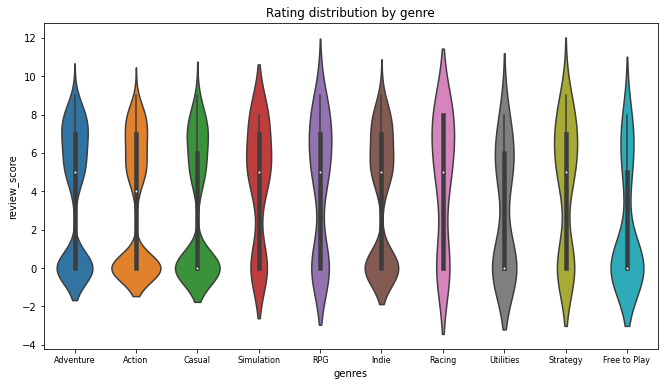

In [55]:
fig, ax = plt.subplots(figsize=(11,6))
sns.violinplot(x='genres', y='review_score', data=df, ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre")
plt.show()

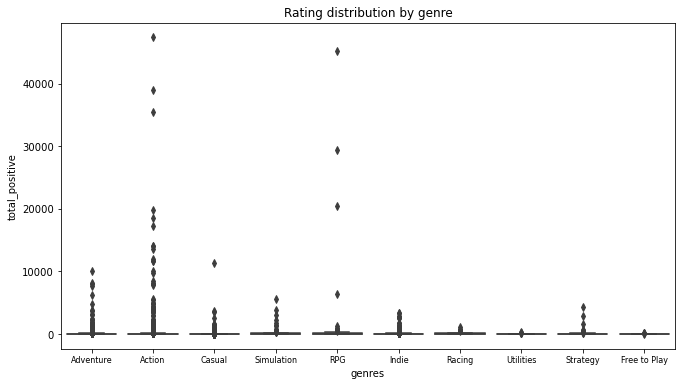

In [62]:
fig, ax = plt.subplots(figsize=(11,6))
sns.boxplot(x='genres', y='total_positive', data=df, ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre")
plt.show()

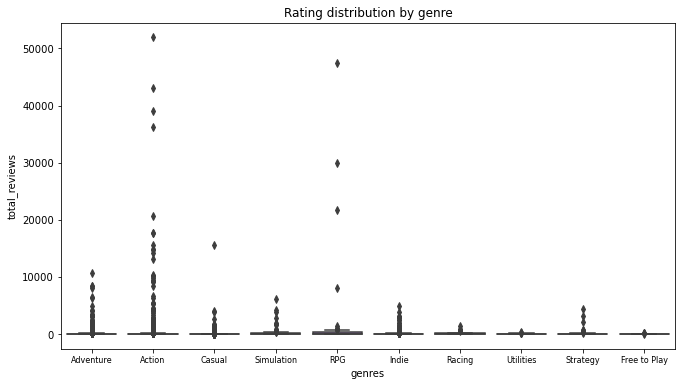

In [61]:
fig, ax = plt.subplots(figsize=(11,6))
sns.boxplot(x='genres', y='total_reviews', data=df, ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre")
plt.show()